<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>
Lecture 3: Linear Models for Classification
</p><br/>
Code adapted from Andreas C. Müller - the author of the O'Reilly book "Introduction to machine learning with Python"
<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Breast Cancer Dataset
classification dataset

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

cancer = load_breast_cancer()
X, y = scale(cancer.data), cancer.target
X.shape

(569, 30)

In [3]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## perform train-test split
Dividing the dataset into two parts</br>
1.   X_train, y_train for training the model
2.   X_test, y_test for evaluating the accuracy of the prediction




In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

#### Use only two features to build the model

In [5]:
#defining the model
logreg = LogisticRegression()
#fitting the model
logreg.fit(X_train[:, :2], y_train)

LogisticRegression()

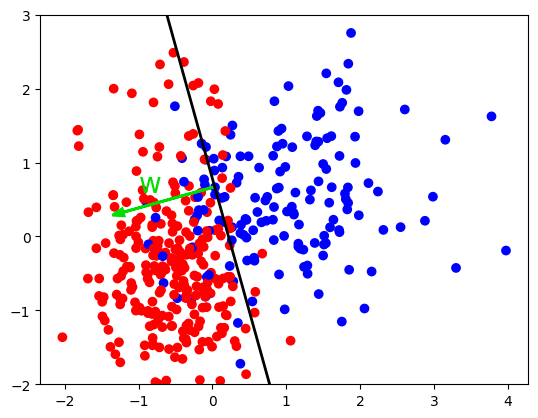

In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="bwr")
coef = logreg.coef_.ravel()
line = np.linspace(X_train[:, 1].min(), X_train[:, 1].max())
line2 = - (line * coef[1]  + logreg.intercept_) / coef[0]
plt.plot(line2, line, c='k', linewidth=2)
plt.arrow(line2[20], line[20], .4 * coef[0], .4 * coef[1], color='#00dd00', linewidth=2, head_width=.1)
plt.text(-1, .6, "w", color='#00dd00', fontsize=20)
plt.ylim(-2, 3)
plt.gca().set_aspect("equal")


In [7]:
print(f"Training set score: {logreg.score(X_train[:, :2], y_train):.3f}")
print(f"Test set score: {logreg.score(X_test[:, :2], y_test):.3f}")

Training set score: 0.887
Test set score: 0.902


#### Use all features

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(solver = 'liblinear').fit(X_train, y_train)

print(f"Training set score: {logreg.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg.score(X_test, y_test):.3f}")

Training set score: 0.953
Test set score: 0.958


In [9]:
#What's the difference between .predict() vs .predict_proba()?
y_predict = logreg.predict(X_test)
print(y_predict)
y_prob = logreg.predict_proba(X_test)
print(y_prob)

[1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0
 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
[[1.95772613e-02 9.80422739e-01]
 [9.99047148e-01 9.52851797e-04]
 [1.23136760e-01 8.76863240e-01]
 [1.39217467e-01 8.60782533e-01]
 [1.43751161e-01 8.56248839e-01]
 [9.99999958e-01 4.19287039e-08]
 [8.97992588e-01 1.02007412e-01]
 [9.99993384e-01 6.61642453e-06]
 [9.83322215e-01 1.66777846e-02]
 [5.73813533e-03 9.94261865e-01]
 [4.96295837e-01 5.03704163e-01]
 [2.52152060e-03 9.97478479e-01]
 [9.99999978e-01 2.19463498e-08]
 [9.99999603e-01 3.96877172e-07]
 [1.08929361e-01 8.91070639e-01]
 [6.23433511e-03 9.93765665e-01]
 [9.99999999e-01 1.49994922e-09]
 [7.32580011e-01 2.67419989e-01]
 [6.20120443e-02 9.37987956e-01]
 [2.78727278e-03 9.97212727e-01]
 [9.99998097e-01 1.90305367e-06]
 [9.87346437e-01

In [15]:
# Weak Regularization

logreg100 = LogisticRegression(C=100, solver = 'liblinear').fit(X_train, y_train)
#logreg100 = LogisticRegression(C=100, max_iter = 1000).fit(X_train, y_train)
print(f"Training set score: {logreg.score(X_train, y_train):.3f}")
print(f"Test set score: {logreg.score(X_test, y_test):.3f}")

Training set score: 0.953
Test set score: 0.958


In [11]:
# Strong Regularization

logreg001 = LogisticRegression(C=1, solver = 'liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


# Multiclass Classification

### Iris dataset

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
X, y = iris.data, iris.target
print(X.shape)
print(np.bincount(y))

In [ ]:
from sklearn.linear_model import LogisticRegression

#Fit the whole X, Y, no scaling, no train-test split
logreg = LogisticRegression( solver="lbfgs", max_iter=500).fit(X, y)
print(logreg.coef_.shape)

In [ ]:
print(logreg.predict(X))
#Try .predict_proba()


In [ ]:
logreg.coef_

In [ ]:
logreg.intercept_

In [ ]:
from sklearn.preprocessing import scale
logreg = LogisticRegression(fit_intercept=False, multi_class="multinomial", solver="lbfgs", max_iter=500).fit(scale(X), y)

In [ ]:
logreg.coef_

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(6, 1.5))
for ax, coef, classname in zip(axes, logreg.coef_, iris.target_names):
    ax.barh(range(4), coef, height=.5, color=plt.cm.bwr_r(np.sign(coef)))
    ax.set_xlim(logreg.coef_.min() - .1, logreg.coef_.max() + .1)

    ax.set_title(classname)
    ax.set_frame_on(False)
    ax.set_yticks(())

axes[0].set_yticks(range(4))
axes[0].set_yticklabels(iris.feature_names)
plt.tight_layout()